In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
import random

In [46]:
df = pd.read_csv('..\..\Project\creditcard.csv')
df.bias = 1
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [47]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [54]:
# Undersampling

def undersample(df:pd.DataFrame, label_col_name:str, ratio=1/2, random_state=0) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    fraud = df.loc[df[label_col_name]==df[label_col_name].value_counts().argmin()]
    n_fraud = df.loc[df[label_col_name]==df[label_col_name].value_counts().argmax()]
    (n_fraud, unused) = train_test_split(df,train_size=int(round(nmin*(1-ratio)/ratio)))
    ret = pd.concat([fraud,n_fraud]).sample(frac=1,random_state=random_state).reset_index(drop=True)
    return ret, unused

In [83]:
ratio = np.arange(19)+2
R2_train = []
R2_test = []
R2_unused = []

for k in ratio:

    (df_under, unused) = undersample(df,'Class',ratio=1/k)

    # train test split
    (df_train, df_test) = train_test_split(df_under, train_size=0.8, test_size=0.2, stratify=df_under.Class)
    X_train = df_train.drop('Class',axis=1)
    y_train = df_train.Class
    X_test = df_test.drop('Class',axis=1)
    y_test = df_test.Class
    X_unused = unused.drop('Class',axis=1)
    y_unused = unused.Class

    # logistic regressor CV
    lrCV = LogisticRegressionCV(fit_intercept=True,max_iter=1e10)
    lrCV.fit(X_train,y_train)
#    print('Baseline  ', round(df_under.Class.value_counts()[0]/df_under.shape[0],2))
#    print('train  R2 ', lrCV.score(X_train,y_train).round(3))
#    print(' test  R2 ', lrCV.score(X_test,y_test).round(3))
#    print('unused R2 ', lrCV.score(X_unused,y_unused).round(4))
    R2_train.append(lrCV.score(X_train,y_train))
    R2_test.append(lrCV.score(X_test,y_test))
    R2_unused.append(lrCV.score(X_unused,y_unused))
    
    print(k)
    
results = pd.DataFrame()
results['ratio'] = 1/ratio
results['Train R2'] = R2_train
results['Test R2'] = R2_test
results['unused R2'] = R2_unused

results

<AxesSubplot:xlabel='ratio'>

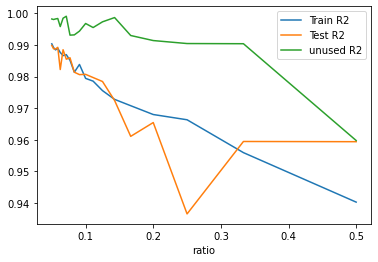

In [86]:
plot1 = results.plot.line(x='ratio',y='Train R2')
results.plot.line(x='ratio',y='Test R2',ax=plot1)
results.plot.line(x='ratio',y='unused R2',ax=plot1)

In [91]:
ratio = np.arange(19)+2
R2_train = []
R2_test = []
R2_unused = []

for k in ratio:

    (df_under, unused) = undersample(df,'Class',ratio=1/k)

    # train test split
    (df_train, df_test) = train_test_split(df_under, train_size=0.8, test_size=0.2, stratify=df_under.Class)
    X_train = df_train.drop('Class',axis=1)
    y_train = df_train.Class
    X_test = df_test.drop('Class',axis=1)
    y_test = df_test.Class
    X_unused = unused.drop('Class',axis=1)
    y_unused = unused.Class

    # logistic regressor CV
    kNN = KNeighborsClassifier(n_neighbors=5)
    kNN.fit(X_train,y_train)
#    print('Baseline  ', round(df_under.Class.value_counts()[0]/df_under.shape[0],2))
#    print('train  R2 ', lrCV.score(X_train,y_train).round(3))
#    print(' test  R2 ', lrCV.score(X_test,y_test).round(3))
#    print('unused R2 ', lrCV.score(X_unused,y_unused).round(4))
    R2_train.append(kNN.score(X_train,y_train))
    R2_test.append(kNN.score(X_test,y_test))
    R2_unused.append(kNN.score(X_unused,y_unused))
    
    print(k)
    
results = pd.DataFrame()
results['ratio'] = 1/ratio
results['Train R2'] = R2_train
results['Test R2'] = R2_test
results['unused R2'] = R2_unused

results

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


,ratio,Train R2,Test R2,unused R2
0,0.500000,0.763659,0.680203,0.641137
1,0.333333,0.788983,0.760135,0.854645
2,0.250000,0.841804,0.748731,0.889151
3,0.200000,0.861280,0.792683,0.936756
4,0.166667,0.879712,0.835871,0.942245
5,0.142857,0.888566,0.859216,0.956772
6,0.125000,0.900572,0.881980,0.962380
7,0.111111,0.907679,0.881490,0.976819
8,0.100000,0.919715,0.902439,0.980605
9,0.090909,0.924232,0.904894,0.976401


<AxesSubplot:xlabel='ratio'>

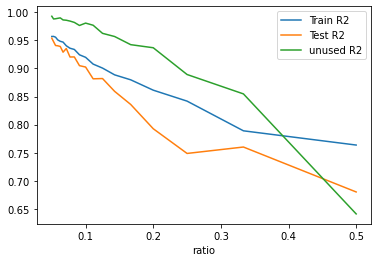

In [92]:
plot1 = results.plot.line(x='ratio',y='Train R2')
results.plot.line(x='ratio',y='Test R2',ax=plot1)
results.plot.line(x='ratio',y='unused R2',ax=plot1)